# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import stats
from lib.plots.data import (DataPlotType, stack)
from lib.data.func import (DataFunc)
from lib.data.schema import (DataType)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
def φ_labels(φ):
    return [r"$\varphi=$"+f"{numpy.array2string(f, precision=2, separator=',')}" for f in φ]

## Simulations

In [3]:
nsample = 1000

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample)

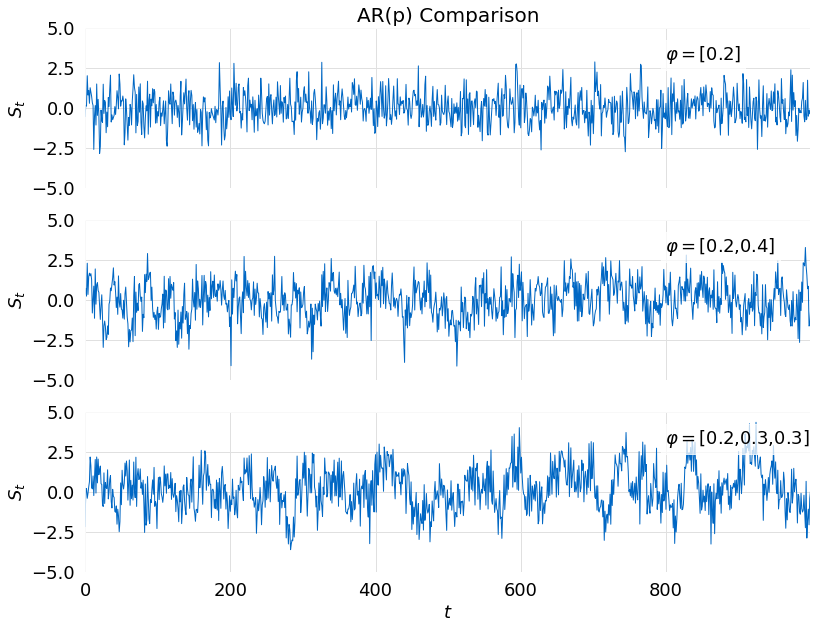

In [4]:
labels = φ_labels([φ1, φ2, φ3])
title = "AR(p) Comparison"
samples = [ar1, ar2, ar3]
stack(samples, ylim=[-5.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Estimation of $\text{AR}(p)$ Parameters ($\sigma = 1$)

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example $\varphi = 0.2$

In [5]:
df = DataFunc.apply_func_type(ar1, DataType.PACF, nlags=1)
df["PACF"][1]

0.1633911462147781

In [6]:
result = arima.ar_fit(ar1, 1)

In [7]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1371.451
Date:                Fri, 06 May 2022   AIC                           2748.902
Time:                        09:50:32   BIC                           2763.625
Sample:                             0   HQIC                          2754.498
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0298      0.036      0.826      0.409      -0.041       0.101
ar.L1          0.1633      0.030      5.439      0.000       0.104       0.222
sigma2         0.9094      0.040     22.517      0.000       0.830       0.989
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.97   Prob(JB):                         0.65
Heteroskedasticity (H):               0.95   Skew:                             0.07
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
ar1.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2]), 'θ': [], 'σ': 1.0, 'μ': 0.0, 'γ': 0.0},
  'Description': 'ARIMA(1,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': [0.029797766976461967, 0.03608987944552044],
    'Parameters': [[0.16331892468267406, 0.03002707415787685]],
    'Sigma2': [0.9093533222796512, 0.04038450006389355]}},
  'Tests': {}},
 'Date': '06/05/2022 09:50:32',
 'Name': 'ARMA-Simulation-6254632d-b212-42c0-888b-84b32f71f804'}

### AR(2) Example $\varphi = [0.2, 0.4]$

In [9]:
df = DataFunc.apply_func_type(ar2, DataType.PACF, nlags=2)
df["PACF"][1:3]

1    0.206979
2    0.403827
Name: PACF, dtype: float64

In [10]:
result = arima.ar_fit(ar2, 2)

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1406.857
Date:                Fri, 06 May 2022   AIC                           2821.714
Time:                        09:50:32   BIC                           2841.345
Sample:                             0   HQIC                          2829.176
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0267      0.081     -0.331      0.740      -0.185       0.131
ar.L1          0.2068      0.029      7.157      0.000       0.150       0.263
ar.L2          0.4043      0.030     13.683      0.000       0.346       0.462
sigma2         0.9756      0.043     22.862      0.000       0.892       1.059
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.67   Prob(JB):                         0.82
Heteroskedasticity (H):               0.95   Skew:                            -0.02
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
ar2.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2, 0.4]),
   'θ': [],
   'σ': 1.0,
   'μ': 0.0,
   'γ': 0.0},
  'Description': 'ARIMA(2,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(2)': {'Type': <EstType.AR: 'AR'>,
    'Const': [-0.02674496973455853, 0.0806926187607458],
    'Parameters': [[0.2068422015389064, 0.028901568886209223],
     [0.4043025152977994, 0.02954705440845513]],
    'Sigma2': [0.975648434964771, 0.04267630860685721]}},
  'Tests': {}},
 'Date': '06/05/2022 09:50:32',
 'Name': 'ARMA-Simulation-937f0383-5cb4-405f-b4a4-158a7aec40f0'}

### AR(3) Example $\varphi = [0.2, 0.3, 0.3]$

In [13]:
df = DataFunc.apply_func_type(ar3, DataType.PACF, nlags=3)
df["PACF"][1:4]

1    0.180283
2    0.281329
3    0.310159
Name: PACF, dtype: float64

In [14]:
result = arima.ar_fit(ar3, 3)

In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1451.747
Date:                Fri, 06 May 2022   AIC                           2913.494
Time:                        09:50:32   BIC                           2938.033
Sample:                             0   HQIC                          2922.820
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.141      1.285      0.199      -0.095       0.457
ar.L1          0.1793      0.032      5.564      0.000       0.116       0.242
ar.L2          0.2812      0.029      9.534      0.000       0.223       0.339
ar.L3          0.3116      0.029     10.623      0.000       0.254       0.369
sigma2         1.0669      0.050     21.238      0.000       0.968       1.165
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.47
Prob(Q):                              0.99   Prob(JB):                         0.48
Heteroskedasticity (H):               0.96   Skew:                             0.01
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
ar3.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2, 0.3, 0.3]),
   'θ': [],
   'σ': 1.0,
   'μ': 0.0,
   'γ': 0.0},
  'Description': 'ARIMA(3,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': [0.18106923163633232, 0.14087275755261836],
    'Parameters': [[0.1793080706730767, 0.0322292144988252],
     [0.28121319285642427, 0.02949430216160945],
     [0.31162370761870983, 0.029335722590416304]],
    'Sigma2': [1.0669319484859632, 0.05023755704896821]}},
  'Tests': {}},
 'Date': '06/05/2022 09:50:32',
 'Name': 'ARMA-Simulation-966a9820-6001-440e-bd81-5be8c2b59f72'}

## Simulations $\sigma = 5.0$

In [17]:
nsample = 10000
σ = 5.0

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample, σ)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample, σ)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample, σ)

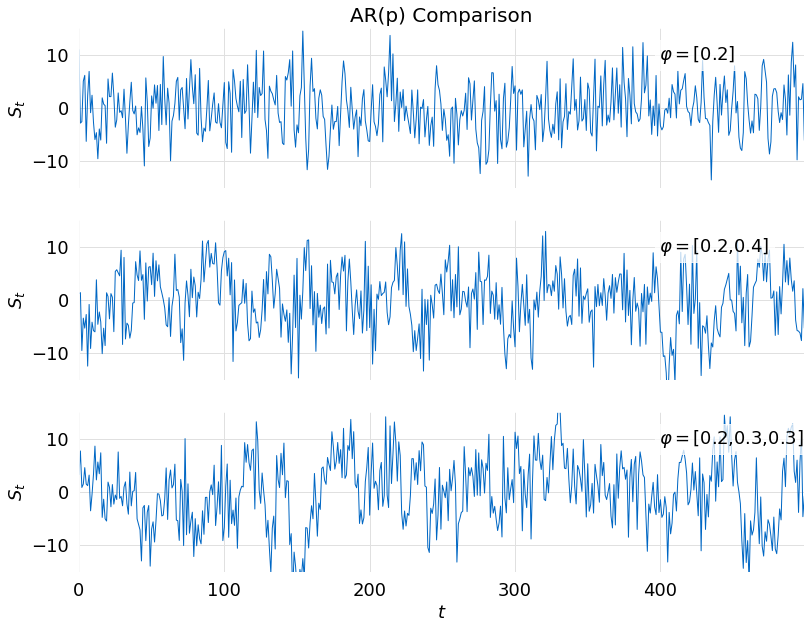

In [18]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
stack(samples, ylim=[-15.0, 15.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

### AR(1) Example ($\varphi = 0.2$)

In [19]:
df = DataFunc.apply_func_type(ar1, DataType.PACF, nlags=1)
df["PACF"][1]

0.20371056690498013

In [20]:
result = arima.ar_fit(ar1, 1)

In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -30246.333
Date:                Fri, 06 May 2022   AIC                          60498.665
Time:                        09:50:33   BIC                          60520.296
Sample:                             0   HQIC                         60505.987
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0374      0.063      0.598      0.550      -0.085       0.160
ar.L1          0.2038      0.010     20.619      0.000       0.184       0.223
sigma2        24.8133      0.355     69.924      0.000      24.118      25.509
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.76   Prob(JB):                         0.60
Heteroskedasticity (H):               1.00   Skew:                             0.01
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
ar1.attrs

{'S(t)': {'npts': 10000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2]), 'θ': [], 'σ': 5.0, 'μ': 0.0, 'γ': 0.0},
  'Description': 'ARIMA(1,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': [0.037426177540417604, 0.06255834148166817],
    'Parameters': [[0.20379306925562773, 0.009883930544582791]],
    'Sigma2': [24.813341194853432, 0.3548594491263903]}},
  'Tests': {}},
 'Date': '06/05/2022 09:50:32',
 'Name': 'ARMA-Simulation-bb3460f5-236c-401a-ab9a-50b4e8d77e36'}

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [23]:
df = DataFunc.apply_func_type(ar2, DataType.PACF, nlags=2)
df["PACF"][1:3]

1    0.200085
2    0.402685
Name: PACF, dtype: float64

In [24]:
result = arima.ar_fit(ar2, 2)

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -30328.079
Date:                Fri, 06 May 2022   AIC                          60664.158
Time:                        09:50:33   BIC                          60692.999
Sample:                             0   HQIC                         60673.921
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1990      0.127     -1.572      0.116      -0.447       0.049
ar.L1          0.2000      0.009     21.695      0.000       0.182       0.218
ar.L2          0.4029      0.009     43.286      0.000       0.385       0.421
sigma2        25.2257      0.360     70.106      0.000      24.521      25.931
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.82   Prob(JB):                         0.70
Heteroskedasticity (H):               1.06   Skew:                            -0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
ar2.attrs

{'S(t)': {'npts': 10000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2, 0.4]),
   'θ': [],
   'σ': 5.0,
   'μ': 0.0,
   'γ': 0.0},
  'Description': 'ARIMA(2,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(2)': {'Type': <EstType.AR: 'AR'>,
    'Const': [-0.19904440762590372, 0.12658273576972445],
    'Parameters': [[0.20002051654447495, 0.0092197476765396],
     [0.40286633877087763, 0.009307091285923934]],
    'Sigma2': [25.22573868093199, 0.3598218284930329]}},
  'Tests': {}},
 'Date': '06/05/2022 09:50:32',
 'Name': 'ARMA-Simulation-a4cb657b-9abc-4862-85af-109caa09fa1c'}

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [27]:
df = DataFunc.apply_func_type(ar3, DataType.PACF, nlags=3)
df["PACF"][1:4]

1    0.198471
2    0.290833
3    0.305444
Name: PACF, dtype: float64

In [28]:
result = arima.ar_fit(ar3, 3)

In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -30327.773
Date:                Fri, 06 May 2022   AIC                          60665.546
Time:                        09:50:34   BIC                          60701.598
Sample:                             0   HQIC                         60677.749
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0631      0.245      0.258      0.797      -0.417       0.543
ar.L1          0.1984      0.009     21.077      0.000       0.180       0.217
ar.L2          0.2910      0.009     31.498      0.000       0.273       0.309
ar.L3          0.3056      0.010     32.043      0.000       0.287       0.324
sigma2        25.2215      0.353     71.448      0.000      24.530      25.913
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.91   Prob(JB):                         0.68
Heteroskedasticity (H):               1.02   Skew:                             0.00
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
ar3.attrs

{'S(t)': {'npts': 10000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2, 0.3, 0.3]),
   'θ': [],
   'σ': 5.0,
   'μ': 0.0,
   'γ': 0.0},
  'Description': 'ARIMA(3,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': [0.06313649395164231, 0.24494922858579593],
    'Parameters': [[0.1984240104868983, 0.009414447412932729],
     [0.29096515436401726, 0.009237430998697579],
     [0.30555888543088483, 0.009535779814380712]],
    'Sigma2': [25.22145581459098, 0.35300637289872167]}},
  'Tests': {}},
 'Date': '06/05/2022 09:50:32',
 'Name': 'ARMA-Simulation-47858915-01cf-4e48-b978-d7a9f6e03cf2'}